# Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis 

#### In Part 2, we will be performing Descriptor Calculation and Exploratory Data Analysis.

## Installing Conda and rdkit

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-05-05 16:26:00--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 108.162.193.111, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  16.2MB/s    in 4.8s    

2024-05-05 16:26:05 (16.9 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

libpng-1.6.37        | 278 KB    | ##################################### | 100% 
ca-certificates-2024 | 127 KB    | ##################################### | 100% 
openjpeg-2.4.0       | 331 KB    | ##################################### | 100% 
jpeg-9e              | 240 KB    | ##################################### | 100% 
pluggy-1.0.0         | 29 KB     | ##################################### | 100% 
olefile-0.46         | 50 KB     | ##################################### | 100% 
libuuid-1.0.3        | 17 KB     | ##################################### | 100% 
certifi-2022.12.7    | 150 KB    | ##################################### | 100% 
importlib-metadata-4 | 40 KB     | ##################################### | 100% 
libxcb-1.15          | 505 KB    | ##################################### | 100% 
blas-1.0             | 6 KB      | ##################################### | 100% 
ruamel.yaml.clib-0.2 | 133 KB    | ##################################### | 100% 
pandas-1.3.5         | 9.3 M

In [31]:
!pip install --upgrade matplotlib seaborn

## Loading the bioactivity dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('SARS_coronavirus_3C_proteinase_bioactivity_data_curated.csv')

In [4]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive


## Calculating Lipinski Descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

### Importing Lib

In [10]:
!apt-get install -y libxrender-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpthread-stubs0-dev libx11-dev libxau-dev libxcb1-dev libxdmcp-dev
  libxrender1 x11proto-dev xorg-sgml-doctools xtrans-dev
Suggested packages:
  libx11-doc libxcb-doc
The following NEW packages will be installed:
  libpthread-stubs0-dev libx11-dev libxau-dev libxcb1-dev libxdmcp-dev
  libxrender-dev libxrender1 x11proto-dev xorg-sgml-doctools xtrans-dev
0 upgraded, 10 newly installed, 0 to remove and 44 not upgraded.
Need to get 1603 kB of archives.
After this operation, 5673 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpthread-stubs0-dev amd64 0.4-1build2 [5516 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 xorg-sgml-doctools all 1:1.11-1.1 [10.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11proto-dev all 2021.5-1 [604 kB]
Get:4 http://archive.ubunt

In [11]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculating the descriptors

Function inspired from the below link - 
https://codeocean.com/explore/capsules?query=tag:data-curation

In [12]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [13]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
81,338.359,3.40102,0.0,5.0
82,296.366,3.44330,0.0,3.0
83,276.291,4.09564,0.0,3.0
84,278.307,3.29102,0.0,3.0


### Now combining both of the dataframes

In [14]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [15]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive,338.359,3.40102,0.0,5.0
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive,296.366,3.44330,0.0,3.0
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive,276.291,4.09564,0.0,3.0
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive,278.307,3.29102,0.0,3.0


In [17]:
import matplotlib.pyplot as plt

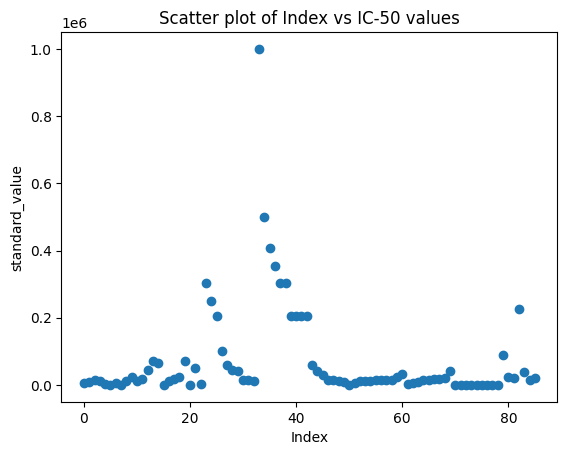

In [19]:
plt.scatter(df_combined.index, df_combined['standard_value'])
plt.xlabel('Index')
plt.ylabel('standard_value')
plt.title('Scatter plot of Index vs IC-50 values')
plt.show()

In [28]:
from scipy.stats import skew
skewness = skew(df_combined['standard_value'])
print(f'Skewness of standard_value: {skewness}')

Skewness of standard_value: 3.896004970613074


As we can see that the IC-50 values or the standard_values are right skewed. 

Skewness of column1: 3.896004970613074


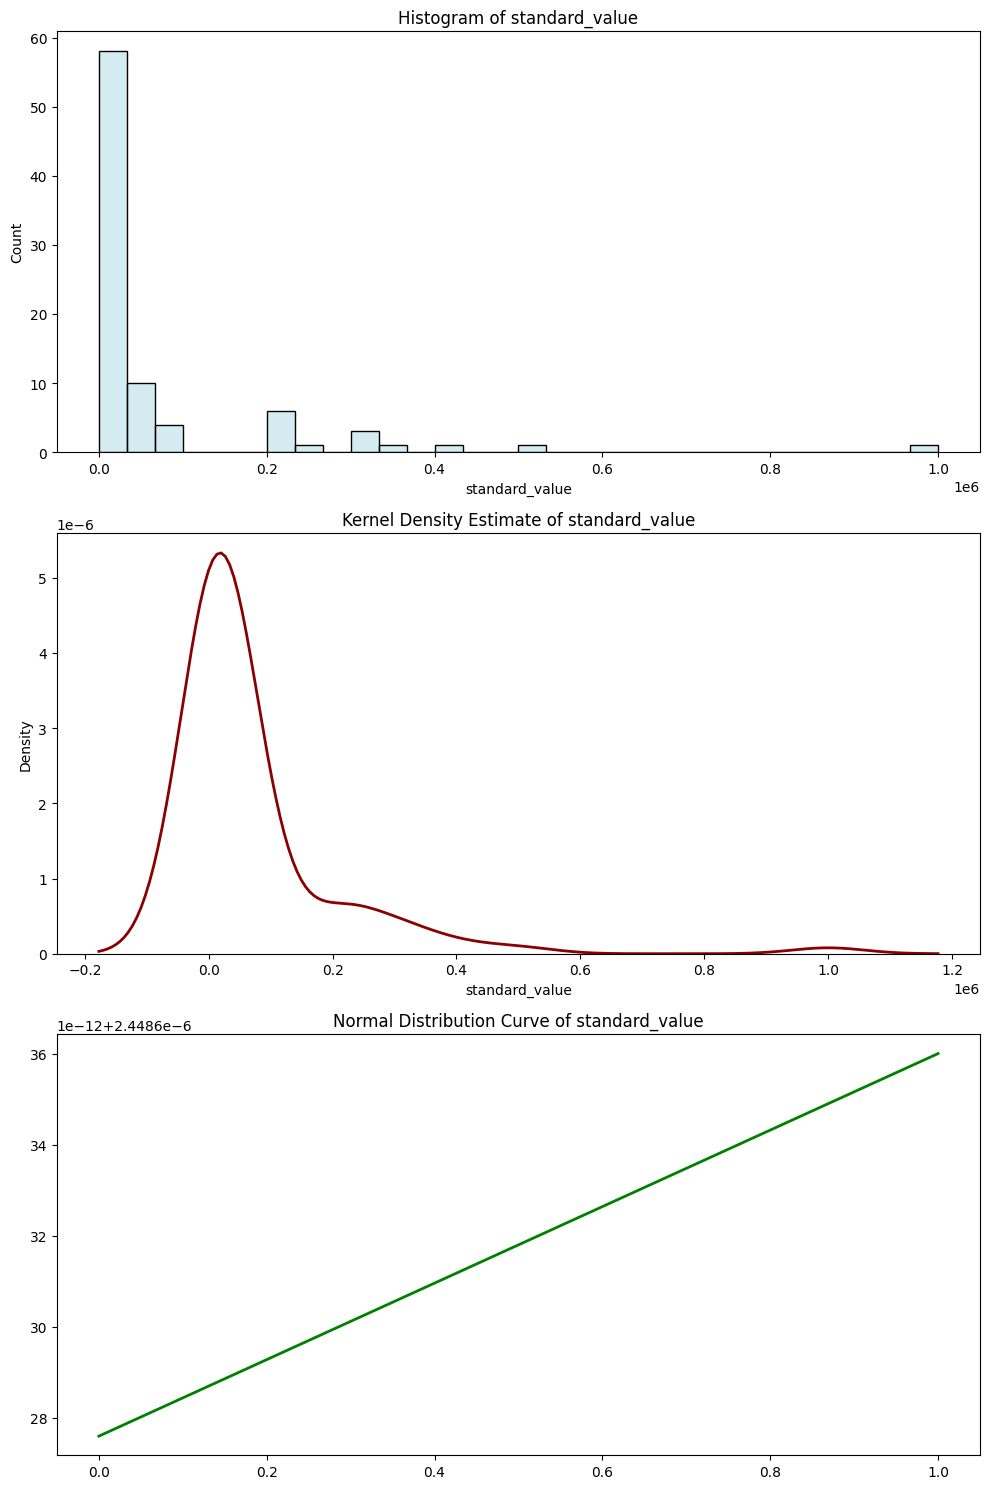

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm

# Assuming 'df' is your DataFrame and 'column1' is the column you want to check
column = df_combined['standard_value']

# Calculate skewness
skewness = skew(column)
print(f'Skewness of column1: {skewness}')

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the histogram
sns.histplot(column, kde=False, ax=axs[0], color='lightblue', alpha=0.5, bins=30)
axs[0].set_title('Histogram of standard_value')

# Plot the density function
sns.kdeplot(column, ax=axs[1], color='darkred', linewidth=2)
axs[1].set_title('Kernel Density Estimate of standard_value')

# Plot a normal distribution curve for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, column.mean(), column.std())
axs[2].plot(x, p, linewidth=2, color='green')
axs[2].set_title('Normal Distribution Curve of standard_value')

plt.tight_layout()
plt.show()


In [35]:
df_combined.describe()

,standard_value,MW,LogP,NumHDonors,NumHAcceptors
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,71384.050000,376.751012,3.711420,0.872093,5.232558
std,144115.579835,91.121102,1.420821,0.891747,2.090170
min,50.000000,204.185000,-0.055400,0.000000,2.000000
25%,9550.000000,305.310000,2.672605,0.000000,4.000000
50%,16000.000000,367.615500,3.681640,1.000000,5.000000
75%,48927.205000,437.097000,4.463230,2.000000,6.000000
max,1000000.000000,588.635000,7.051540,3.000000,12.000000


### Converting the IC-50 values to pIC 50 values

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

- Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
- Take the molar value and apply -log10
- Delete the standard_value column and create a new pIC50 column

In [36]:
#Source - 
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb
# Defining the pIC function

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [38]:
df_combined.standard_value.describe()

count         86.000000
mean       71384.050000
std       144115.579835
min           50.000000
25%         9550.000000
50%        16000.000000
75%        48927.205000
max      1000000.000000
Name: standard_value, dtype: float64

In [41]:
-np.log10( (10**-9)* 100000000 )

1.0

In [43]:
-np.log10( (10**-9)* 10000000000 )

-1.0

Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative. So we will be putting an upper cap on the function defined above. This we'll do by defining a new function below - 

In [44]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [45]:
df_norm = norm_value(df_combined)
df_norm

/root/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,21100.0
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,226700.0
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,38700.0
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,14400.0


In [46]:
df_norm.standard_value_norm.describe()

count         86.000000
mean       71384.050000
std       144115.579835
min           50.000000
25%         9550.000000
50%        16000.000000
75%        48927.205000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [47]:
df_final = pIC50(df_norm)
df_final

/root/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


In [50]:
unique_vals = df_final['NumHDonors'].unique()
print(unique_vals)

[0. 1. 3. 2.]


In [51]:
df_final.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,376.751012,3.711420,0.872093,5.232558,4.848276
std,91.121102,1.420821,0.891747,2.090170,0.972872
min,204.185000,-0.055400,0.000000,2.000000,3.000000
25%,305.310000,2.672605,0.000000,4.000000,4.310772
50%,367.615500,3.681640,1.000000,5.000000,4.795880
75%,437.097000,4.463230,2.000000,6.000000,5.020154
max,588.635000,7.051540,3.000000,12.000000,7.301030


To allow for a more simple and direct comparison between the the bioactivity classes of active and inactive, we'll remove the intermediate class. 

### Removing the intermediate class

In [53]:
df2 = df_final[df_final['class'] != 'intermediate']
df2

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


In [55]:
unique_classes = df2['class'].unique()
print(unique_classes)

['inactive' 'active']


In [56]:
df2.to_csv('SARS_coronavirus_3C_proteinase_bioactivity_data2_class_pIC50.csv')

## That's it for now!!